### LogisticRegression 활용해서 예측

In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import numpy as np


In [6]:
test_y_df = pd.read_csv('../datasets/titanic_gender_submission.csv')
test_df = pd.read_csv('../datasets/titanic_test.csv')
train_df = pd.read_csv('../datasets/titanic_train.csv')

In [28]:
train = train_df[['Pclass', 'Sex', 'Age', 'Survived']]
test = test_df[['Pclass', 'Sex', 'Age']]
test_y = test_y_df['Survived']

In [29]:
train = train.dropna(axis=0)

In [30]:
encoder = LabelEncoder()
train['Sex'] = encoder.fit_transform(train['Sex'])

In [31]:
scaler = MinMaxScaler()

scaler.fit(train[['Age']])

data = scaler.transform(train[['Age']])

train['Age'] = data

In [32]:
X = train.drop('Survived', axis=1)
y = train['Survived']

lr = LogisticRegression()

lr.fit(X, y)


LogisticRegression()

In [33]:
# test 데이터 전처리

# test = test.dropna(axis=0)
test = test.fillna(np.mean(test['Age']))

encoder = LabelEncoder()
test['Sex'] = encoder.fit_transform(test['Sex'])

scaler = MinMaxScaler()
scaler.fit(test[['Age']])
test['Age'] = scaler.transform(test[['Age']])


In [34]:
pred = lr.predict(test)

### accuracy_score, recall_score, precision_score, f1_score, confusion_matrix 구하기

In [27]:
from sklearn.metrics import accuracy_score, \
                            recall_score, \
                            precision_score, \
                            f1_score, \
                            confusion_matrix

In [41]:
def get_eval(y_true, y_pred):
    accruacy = accuracy_score(test_y, pred)
    recall = recall_score(test_y, pred)
    precision = precision_score(test_y, pred)
    f1score = f1_score(test_y, pred)
    matrix = confusion_matrix(test_y, pred)

    return(f'혼동 행렬은 : {matrix}',
           f'재현율은 : {recall}',
           f'정확도는 : {accruacy}',
           f'정밀도는 : {precision}',
           f'f1_score는 : {f1score}')

In [ ]:
get_eval(test_y, pred)

('혼동 행렬은 : [[252  14]\n [ 10 142]]',
 '재현율은 : 0.9342105263157895',
 '정확도는 : 0.9425837320574163',
 '정밀도는 : 0.9102564102564102',
 'f1_score는 : 0.922077922077922')

### sklearn.metrics.precision_recall_curve
* sklearn.metrics.precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=False)

In [43]:
pred_proba = lr.predict_proba(test)

In [45]:
pred_proba[:5]

array([[0.92140531, 0.07859469],
       [0.59987979, 0.40012021],
       [0.88759265, 0.11240735],
       [0.90468156, 0.09531844],
       [0.42576367, 0.57423633]])

In [46]:
pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [49]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = \
      precision_recall_curve(test_y, pred_proba[:, 1])

In [52]:
import matplotlib.pyplot as plt

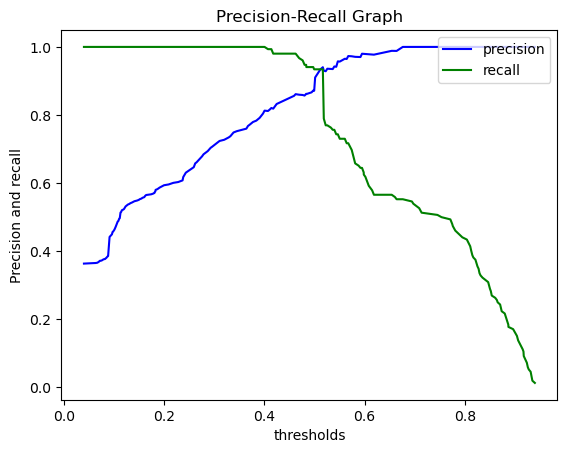

Text(0.5, 1.0, 'Precision-Recall Graph')

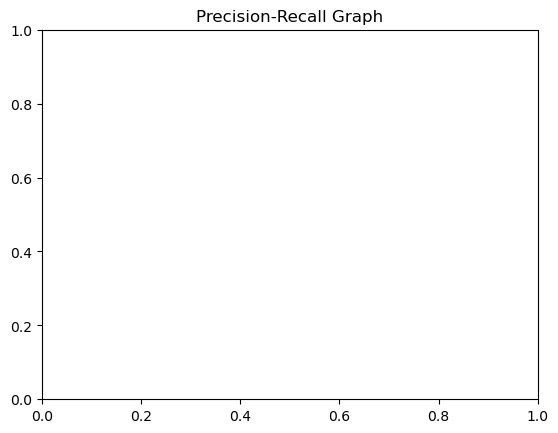

In [54]:

plt.title("Precision-Recall Graph")

plt.xlabel("thresholds")
plt.ylabel("Precision and recall")
plt.plot(thresholds, precision[:194], "b", label = 'precision')
plt.plot(thresholds, recall[:194], "g", label = "recall")
plt.legend(loc = "upper right")
plt.show()
plt.title("Precision-Recall Graph")